In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

#open the file
datapath='/Users/rachellee/Desktop/research/references/'
filename='flux_table_70um.txt'
data=np.loadtxt(datapath+filename)

#number is coloumn 0, flux is column 25
number=data[:,0]
flux=data[:,25]

In [2]:
#remove zeros in the flux
flux_new=[]
for i in range(len(flux)):
    if flux[i]!=0:
        flux_new.append(flux[i])

In [3]:
def my_probability(burst,bins,duration):
    prob=1/(bins*(burst-1))
    return prob

In [4]:
#calculate the mean of each time step
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]

## 1 bin

In [6]:
run=50
t=300
cadence=26

#run it 50 times
#start with function
def bursts1(full_time,size,probability,L_matrix,burst_matrix,change_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=26
    steps=t*cadence
    burst_prob=probability/cadence
    burst=burst_matrix
    L=L_matrix
    C=change_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                    C[j,i]=0
                elif prob<=burst_prob:
                    burst[j,i:(30*cadence)+i]=np.nan
                    L[j,i:(30*cadence)+i]=cluster_mag[j]-5
                    C[j,i:(30*cadence)+i]=100
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
    #find the fraction at a time
    burst_num=[]
    fraction_val=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True:
                fraction_val+=1
        burst_num.append(fraction_val)
        fraction_val=0
        
    return burst_total,burst_num,burst,L,C

In [7]:
cluster_size2000_1=2000
steps=t*cadence
burst2000_1=np.ones((cluster_size2000_1,steps))
L2000_1=np.zeros((cluster_size2000_1,steps))
C2000_1=np.zeros((cluster_size2000_1,steps))
prob2000_1=1/(101*30)

#1 bin
burst_total2000_1=[]
burst_num2000_1=[]
final_burst2000_1=[]
final_L2000_1=[]
final_C2000_1=[]

for i in range(run):
    print(i)
    burst2000_1=np.ones((cluster_size2000_1,steps))
    L2000_1=np.zeros((cluster_size2000_1,steps))
    C2000_1=np.zeros((cluster_size2000_1,steps))
    values2000_1=bursts1(t,2000,prob2000_1,L2000_1,burst2000_1,C2000_1)
    burst_total2000_1.append(values2000_1[0])
    burst_num2000_1.append(values2000_1[1])
    final_burst2000_1.append(values2000_1[2])
    final_L2000_1.append(values2000_1[3])
    final_C2000_1.append(values2000_1[4])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [8]:
#write output files
values2000_1bin_table=Table()
values2000_1bin_table['burst_total']=burst_total2000_1
values2000_1bin_table['burst_number']=burst_num2000_1  
ascii.write(values2000_1bin_table,'/Users/rachellee/Downloads/data/2000stars_only/values2000_1bin_2week',\
            format='ecsv',overwrite=True)

np.save('/Users/rachellee/Downloads/data/2000stars_only/burst2000_1.npy',final_burst2000_1)
np.save('/Users/rachellee/Downloads/data/2000stars_only/L2000_1.npy',final_L2000_1)
np.save('/Users/rachellee/Downloads/data/2000stars_only/C2000_1.npy',final_C2000_1)

In [9]:
cadence_num_bursts2000_1=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts2000_1.append(burst_num2000_1[i][j])

## 2 bins

In [10]:
run=2
t=300
cadence=26

#run it 50 times
#start with function
def bursts2(full_time,size,prob40,prob100,L_matrix,burst_matrix,change_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=26
    steps=t*cadence
    burst_prob40=prob40/cadence
    burst_prob100=prob100/cadence
    burst=burst_matrix
    L=L_matrix
    C=change_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob40:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                    C[j,i]=0
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:(3*cadence)+i]=np.nan
                    L[j,i:(3*cadence)+i]=cluster_mag[j]-4
                    C[j,i:(3*cadence)+i]=40
                elif prob<=burst_prob100:
                    burst[j,i:(30*cadence)+i]=np.nan
                    L[j,i:(30*cadence)+i]=cluster_mag[j]-5
                    C[j,i:(30*cadence)+i]=100
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total40=0
    total100=0
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==40:
                total40+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==100:
                total100+=1
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
            if np.isnan(burst[j,i])==True and C[j,i]==40:
                frac_val40+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and C[j,i]==100:
                frac_val100+=1
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
    
        
    return burst_total,burst_total40,burst_total100,burst_num40,burst_num100,burst,L,C

In [11]:
A2=np.array([[301,-39],[-99,121]])
B2=np.array([1,1])
X2=np.linalg.inv(A2).dot(B2)

print(X2)

[0.004914   0.01228501]


In [12]:
cluster_size2000_2=2000
steps=t*cadence
burst2000_2=np.ones((cluster_size2000_2,steps))
L2000_2=np.zeros((cluster_size2000_2,steps))
C2000_2=np.zeros((cluster_size2000_2,steps))
prob2000_2_40=0.5/(40*3)
prob2000_2_100=0.5/(100*30)

#1 bin
burst_total2000_2=[]
burst_total2000_2_40=[]
burst_num2000_2_40=[]
burst_total2000_2_100=[]
burst_num2000_2_100=[]
final_burst2000_2=[]
final_L2000_2=[]
final_C2000_2=[]

for i in range(run):
    print(i)
    burst2000_2=np.ones((cluster_size2000_2,steps))
    L2000_2=np.zeros((cluster_size2000_2,steps))
    C2000_2=np.zeros((cluster_size2000_2,steps))
    values2000_2=bursts2(t,2000,prob2000_2_40,prob2000_2_100,L2000_2,burst2000_2,C2000_2)
    burst_total2000_2.append(values2000_2[0])
    burst_total2000_2_40.append(values2000_2[1])
    burst_total2000_2_100.append(values2000_2[2])
    burst_num2000_2_40.append(values2000_2[3])
    burst_num2000_2_100.append(values2000_2[4])
    final_burst2000_2.append(values2000_2[5])
    final_L2000_2.append(values2000_2[6])
    final_C2000_2.append(values2000_2[7])

0
1


In [13]:
#burst_total,burst_total40,burst_total100,burst_num40,burst_num100

values2000_2bin_table=Table()
values2000_2bin_table['burst_total']=burst_total2000_2
values2000_2bin_table['burst_total40']=burst_total2000_2_40
values2000_2bin_table['burst_total100']=burst_total2000_2_100
values2000_2bin_table['burst_num40']=burst_num2000_2_40
values2000_2bin_table['burst_num100']=burst_num2000_2_100
    
ascii.write(values2000_2bin_table,'/Users/rachellee/Downloads/data/2000stars_only/values2000_2bin_2week',\
            format='ecsv',overwrite=True) 

np.save('/Users/rachellee/Downloads/data/2000stars_only/burst2000_2.npy',final_burst2000_2)
np.save('/Users/rachellee/Downloads/data/2000stars_only/L2000_2.npy',final_L2000_2)
np.save('/Users/rachellee/Downloads/data/2000stars_only/C2000_2.npy',final_C2000_2)

In [9]:
print(burst_num2000_2_40)

[[0, 0, 0, 0, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 9, 9, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 19, 17, 16, 16, 15, 16, 16, 17, 17, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 21, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 23, 23, 23, 21, 21, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 18, 18, 19, 19, 19, 20, 21, 21, 22, 23, 23, 23, 23, 23, 22, 22, 22, 22, 23, 21, 21, 21, 21, 22, 23, 23, 21, 21, 22, 22, 22, 22, 21, 21, 21, 21, 21, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 20, 19, 19, 19, 18, 16, 16, 16, 16, 16, 17, 18, 19, 18, 18, 17, 17, 17, 17, 17, 18, 18, 17, 17, 17, 18, 18, 19, 19, 20, 20, 20, 20, 20, 21, 21, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 21, 21, 22, 22, 22, 22, 21, 21, 22, 23, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 26, 26, 26, 26, 26, 27, 28, 29, 29, 29, 29, 29, 

In [14]:
burst_matrix_table=Table()
burst_matrix_table['bursting']=final_burst2000_2
ascii.write(burst_matrix_table,'/Users/rachellee/Downloads/data/2000stars_only/burst_matrix_table',\
            format='ecsv',overwrite=True) 

In [15]:
cadence_num_bursts2000_2_40=[]
cadence_num_bursts2000_2_100=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts2000_2_40.append(burst_num2000_2_40[i][j])
        cadence_num_bursts2000_2_100.append(burst_num2000_2_100[i][j])

## 3 bins

In [74]:
run=50
t=300
cadence=26

#run it 50 times
#start with function
def bursts3(full_time,size,prob16,prob40,prob100,L_matrix,burst_matrix,change_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=26
    steps=t*cadence
    burst_prob16=prob16/cadence
    burst_prob40=prob40/cadence
    burst_prob100=prob100/cadence
    burst=burst_matrix
    L=L_matrix
    C=change_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob16:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                    C[j,i]=0
                elif prob<=burst_prob16 and prob>burst_prob40:
                    burst[j,i:13+i]=np.nan
                    L[j,i:13+i]=cluster_mag[j]-3
                    C[j,i:13+i]=16
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:(3*cadence)+i]=np.nan
                    L[j,i:(3*cadence)+i]=cluster_mag[j]-4
                    C[j,i:(3*cadence)+i]=40
                elif prob<=burst_prob100:
                    burst[j,i:(30*cadence)+i]=np.nan
                    L[j,i:(30*cadence)+i]=cluster_mag[j]-5
                    C[j,i:(30*cadence)+i]=100
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total16=0
    total40=0
    total100=0
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==16:
                total16+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==40:
                total40+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==100:
                total100+=1
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num16=[]
    frac_val16=0
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
            if np.isnan(burst[j,i])==True and C[j,i]==16:
                frac_val16+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
            elif np.isnan(burst[j,i])==True and C[j,i]==40:
                frac_val40+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and C[j,i]==100:
                frac_val100+=1
        burst_num16.append(frac_val16)
        frac_val16=0
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
        
    return burst_total,burst_total16,burst_total40,burst_total100,burst_num16,burst_num40,burst_num100,burst,L,C

In [75]:
A3=np.array([[501,-39,-15],[-99,201,-15],[-99,-39,81]])
B3=np.array([1,1,1])
X3=np.linalg.inv(A3).dot(B3)

print(X3)

[0.00322841 0.00807103 0.02017756]


In [76]:
cluster_size2000_3=2000
steps=t*cadence
burst2000_3=np.ones((cluster_size2000_3,steps))
L2000_3=np.zeros((cluster_size2000_3,steps))
C2000_3=np.empty((cluster_size2000_3,steps))
prob2000_3_16=X3[2]/0.5
prob2000_3_40=X3[1]/3
prob2000_3_100=X3[0]/30

burst_total2000_3=[]
burst_total2000_3_16=[]
burst_num2000_3_16=[]
burst_total2000_3_40=[]
burst_num2000_3_40=[]
burst_total2000_3_100=[]
burst_num2000_3_100=[]
final_burst2000_3=[]
final_L2000_3=[]
final_C2000_3=[]

for i in range(run):
    print(i)
    burst2000_3=np.ones((cluster_size2000_3,steps))
    L2000_3=np.zeros((cluster_size2000_3,steps))
    C2000_3=np.zeros((cluster_size2000_3,steps))
    values2000_3=bursts3(t,2000,prob2000_3_16,prob2000_3_40,prob2000_3_100,L2000_3,burst2000_3,C2000_3)
    burst_total2000_3.append(values2000_3[0])
    burst_total2000_3_16.append(values2000_3[1])
    burst_total2000_3_40.append(values2000_3[2])
    burst_total2000_3_100.append(values2000_3[3])
    burst_num2000_3_16.append(values2000_3[4])
    burst_num2000_3_40.append(values2000_3[5])
    burst_num2000_3_100.append(values2000_3[6])
    final_burst2000_3.append(values2000_3[7])
    final_L2000_3.append(values2000_3[8])
    final_C2000_3.append(values2000_3[9])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [77]:
#burst_total,burst_total16,burst_total40,burst_total100,burst_num16,burst_num40,burst_num100

values2000_3bin_table=Table()
values2000_3bin_table['burst_total']=burst_total2000_3
values2000_3bin_table['burst_total16']=burst_total2000_3_16
values2000_3bin_table['burst_total40']=burst_total2000_3_40
values2000_3bin_table['burst_total100']=burst_total2000_3_100
values2000_3bin_table['burst_num16']=burst_num2000_3_16
values2000_3bin_table['burst_num40']=burst_num2000_3_40
values2000_3bin_table['burst_num100']=burst_num2000_3_100
    
ascii.write(values2000_3bin_table,'/Users/rachellee/Downloads/data/2000stars_only/values2000_3bin_2week',\
            format='ecsv',overwrite=True) 

np.save('/Users/rachellee/Downloads/data/2000stars_only/burst2000_3.npy',final_burst2000_3)
np.save('/Users/rachellee/Downloads/data/2000stars_only/L2000_3.npy',final_L2000_3)
np.save('/Users/rachellee/Downloads/data/2000stars_only/C2000_3.npy',final_C2000_3)

In [78]:
cadence_num_bursts2000_3_16=[]
cadence_num_bursts2000_3_40=[]
cadence_num_bursts2000_3_100=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts2000_3_16.append(burst_num2000_3_16[i][j])
        cadence_num_bursts2000_3_40.append(burst_num2000_3_40[i][j])
        cadence_num_bursts2000_3_100.append(burst_num2000_3_100[i][j])

## 4 bins

In [63]:
run=50
t=300
cadence=26

#run it 50 times
#start with function
def bursts4(full_time,size,prob3,prob16,prob40,prob100,L_matrix,burst_matrix,change_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=26
    steps=t*cadence
    burst_prob3=prob3/cadence
    burst_prob16=prob16/cadence
    burst_prob40=prob40/cadence
    burst_prob100=prob100/cadence
    burst=burst_matrix
    L=L_matrix
    C=change_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob3:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                    C[j,i]=0
                elif prob<=burst_prob3 and prob>burst_prob16:
                    burst[j,i]=np.nan
                    L[j,i]=cluster_mag[j]-1.25
                    C[j,i]=3
                elif prob<=burst_prob16 and prob>burst_prob40:
                    burst[j,i:13+i]=np.nan
                    L[j,i:13+i]=cluster_mag[j]-3
                    C[j,i:13+i]=16
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:(3*cadence)+i]=np.nan
                    L[j,i:(3*cadence)+i]=cluster_mag[j]-4
                    C[j,i:(3*cadence)+i]=40
                elif prob<=burst_prob100:
                    burst[j,i:(30*cadence)+i]=np.nan
                    L[j,i:(30*cadence)+i]=cluster_mag[j]-5
                    C[j,i:(30*cadence)+i]=100
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total3=0
    total16=0
    total40=0
    total100=0
    burst_total3=[]
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-1.25:
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==3:
                total3+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==16:
                total16+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==40:
                total40+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==100:
                total100+=1
        burst_total3.append(total3)
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num3=[]
    frac_val3=0
    burst_num16=[]
    frac_val16=0
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-1.25:
            if np.isnan(burst[j,i])==True and C[j,i]==3:
                frac_val3+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
            elif np.isnan(burst[j,i])==True and C[j,i]==16:
                frac_val16+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
            elif np.isnan(burst[j,i])==True and C[j,i]==40:
                frac_val40+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and C[j,i]==100:
                frac_val100+=1
        burst_num3.append(frac_val3)
        frac_val3=0
        burst_num16.append(frac_val16)
        frac_val16=0
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
        
    return burst_total,burst_total3,burst_total16,burst_total40,burst_total100,burst_num3,burst_num16,\
burst_num40,burst_num100,burst,L,C

In [68]:
A4=np.array([[701,-39,-15,-2],[-99,281,-15,-2],[-99,-39,113,-2],[-99,-39,-15,22]])
B4=np.array([1,1,1,1])
X4=np.linalg.inv(A4).dot(B4)

print(X4)

[0.00225691 0.00564228 0.0141057  0.07523039]


In [69]:
cluster_size2000_4=2000
steps=t*cadence
burst2000_4=np.ones((cluster_size2000_4,steps))
L2000_4=np.zeros((cluster_size2000_4,steps))
C2000_4=np.empty((cluster_size2000_4,steps))
prob2000_4_3=X4[3]/0.04
prob2000_4_16=X4[2]/0.5
prob2000_4_40=X4[1]/3
prob2000_4_100=X4[0]/30

burst_total2000_4=[]
burst_total2000_4_3=[]
burst_num2000_4_3=[]
burst_total2000_4_16=[]
burst_num2000_4_16=[]
burst_total2000_4_40=[]
burst_num2000_4_40=[]
burst_total2000_4_100=[]
burst_num2000_4_100=[]
final_burst2000_4=[]
final_L2000_4=[]
final_C2000_4=[]

for i in range(run):
    print(i)
    burst2000_4=np.ones((cluster_size2000_4,steps))
    L2000_4=np.zeros((cluster_size2000_4,steps))
    C2000_4=np.empty((cluster_size2000_4,steps))
    values2000_4=bursts4(t,2000,prob2000_4_3,prob2000_4_16,prob2000_4_40,prob2000_4_100,L2000_4,burst2000_4,C2000_4)
    burst_total2000_4.append(values2000_4[0])
    burst_total2000_4_3.append(values2000_4[1])
    burst_total2000_4_16.append(values2000_4[2])
    burst_total2000_4_40.append(values2000_4[3])
    burst_total2000_4_100.append(values2000_4[4])
    burst_num2000_4_3.append(values2000_4[5])
    burst_num2000_4_16.append(values2000_4[6])
    burst_num2000_4_40.append(values2000_4[7])
    burst_num2000_4_100.append(values2000_4[8])
    final_burst2000_4.append(values2000_4[9])
    final_L2000_4.append(values2000_4[10])
    final_C2000_4.append(values2000_4[11])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [70]:
#burst_total,burst_total6,burst_total16,burst_total40,burst_total100,burst_num2,burst_num16,burst_num40,burst_num100

values2000_4bin_table=Table()
values2000_4bin_table['burst_total']=burst_total2000_4
values2000_4bin_table['burst_total3']=burst_total2000_4_3
values2000_4bin_table['burst_total16']=burst_total2000_4_16
values2000_4bin_table['burst_total40']=burst_total2000_4_40
values2000_4bin_table['burst_total100']=burst_total2000_4_100
values2000_4bin_table['burst_num3']=burst_num2000_4_3
values2000_4bin_table['burst_num16']=burst_num2000_4_16
values2000_4bin_table['burst_num40']=burst_num2000_4_40
values2000_4bin_table['burst_num100']=burst_num2000_4_100
    
ascii.write(values2000_4bin_table,'/Users/rachellee/Downloads/data/2000stars_only/values2000_4bin_2_week',\
            format='ecsv',overwrite=True) 

np.save('/Users/rachellee/Downloads/data/2000stars_only/burst2000_4.npy',final_burst2000_4)
np.save('/Users/rachellee/Downloads/data/2000stars_only/L2000_4.npy',final_L2000_4)
np.save('/Users/rachellee/Downloads/data/2000stars_only/C2000_4.npy',final_C2000_4)

In [71]:
cadence_num_bursts2000_4_3=[]
cadence_num_bursts2000_4_16=[]
cadence_num_bursts2000_4_40=[]
cadence_num_bursts2000_4_100=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts2000_4_3.append(burst_num2000_4_3[i][j])        
        cadence_num_bursts2000_4_16.append(burst_num2000_4_16[i][j])
        cadence_num_bursts2000_4_40.append(burst_num2000_4_40[i][j])
        cadence_num_bursts2000_4_100.append(burst_num2000_4_100[i][j])

## 5 bins

In [5]:
run=1
t=300
cadence=26

#run it 50 times
#start with function
def bursts5(full_time,size,prob3,prob6,prob16,prob40,prob100,L_matrix,burst_matrix,change_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=26
    steps=t*cadence
    burst_prob3=prob3/cadence
    burst_prob6=prob6/cadence
    burst_prob16=prob16/cadence
    burst_prob40=prob40/cadence
    burst_prob100=prob100/cadence
    burst=burst_matrix
    L=L_matrix
    C=change_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob3:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                    C[j,i]=0
                elif prob<=burst_prob3 and prob>burst_prob16:
                    burst[j,i]=np.nan
                    L[j,i]=cluster_mag[j]-1.25
                    C[j,i]=3
                elif prob<=burst_prob16 and prob>burst_prob6:
                    burst[j,i:13+i]=np.nan
                    L[j,i:13+i]=cluster_mag[j]-3
                    C[j,i:13+i]=16
                elif prob<=burst_prob6 and prob>burst_prob40:
                    burst[j,i:(3*cadence)+i]=np.nan
                    L[j,i:(3*cadence)+i]=cluster_mag[j]-2
                    C[j,i:(3*cadence)+i]=6
                elif prob<=burst_prob40 and prob>burst_prob100:
                    burst[j,i:(3*cadence)+i]=np.nan
                    L[j,i:(3*cadence)+i]=cluster_mag[j]-4
                    C[j,i:(3*cadence)+i]=40
                elif prob<=burst_prob100:
                    burst[j,i:(30*cadence)+i]=np.nan
                    L[j,i:(30*cadence)+i]=cluster_mag[j]-5
                    C[j,i:(30*cadence)+i]=100
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total3=0
    total6=0
    total16=0
    total40=0
    total100=0
    burst_total3=[]
    burst_total6=[]
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-1.25:
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==3:
                total3+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-2:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==6:
                total6+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==16:
                total16+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==40:
                total40+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==100:
                total100+=1
        burst_total3.append(total3)
        burst_total6.append(total6)
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num3=[]
    frac_val3=0
    burst_num6=[]
    frac_val6=0
    burst_num16=[]
    frac_val16=0
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-1.25:
            if np.isnan(burst[j,i])==True and C[j,i]==3:
                frac_val3+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-2:
            elif np.isnan(burst[j,i])==True and C[j,i]==6:
                frac_val6+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
            elif np.isnan(burst[j,i])==True and C[j,i]==16:
                frac_val16+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
            elif np.isnan(burst[j,i])==True and C[j,i]==40:
                frac_val40+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and C[j,i]==100:
                frac_val100+=1
        burst_num3.append(frac_val3)
        frac_val3=0
        burst_num6.append(frac_val6)
        frac_val6=0
        burst_num16.append(frac_val16)
        frac_val16=0
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
        
    return burst_total,burst_total3,burst_total6,burst_total16,burst_total40,burst_total100,burst_num3,burst_num6,\
burst_num16,burst_num40,burst_num100,burst,L,C

In [100]:
A5=np.array([[901,-39,-15,-5,-2],[-99,361,-15,-5,-2],[-99,-39,145,-5,-2],[-99,-39,-15,55,-2],[-99,-39,-15,-5,28]])
B5=np.array([1,1,1,1,1])
X5=np.linalg.inv(A5).dot(B5)
#prob2000_5_3=X5[4]/0.04
#prob2000_5_6=X5[3]/3
#prob2000_5_16=X5[2]/0.5
#prob2000_5_40=X5[1]/3
#prob2000_5_100=X5[0]/30

t100=X5[0]
t40=X5[1]
t16=X5[2]
t6=X5[3]
t3=X5[4]

t0=np.sum(X5)

In [109]:
A6=np.array([[1-t100,-t100,-t100,-t100,-t100,-t100],\
             [-t40,1-t40,-t40,-t40,-t40,-t40],\
             [-t16,-t16,1-t16,-t16,-t16,-t16],\
             [-t6,-t6,-t6,1-t6,-t6,-t6],\
             [-t3,-t3,-t3,-t3,1-t3,-t3],\
             [-t0,-t0,-t0,-t0,-t0,1-t0]])
B6=np.array([0,0,0,0,0,0])
X6=np.linalg.inv(A6).dot(B6)
print(X6)

prob2000_5_3=X6[4]/0.04
prob2000_5_6=X6[3]/3
prob2000_5_16=X6[2]/0.5
prob2000_5_40=X6[1]/3
prob2000_5_100=X6[0]/30

[0. 0. 0. 0. 0. 0.]


In [102]:
cluster_size2000_5=2000
steps=t*cadence
burst2000_5=np.ones((cluster_size2000_5,steps))
L2000_5=np.zeros((cluster_size2000_5,steps))
C2000_5=np.zeros((cluster_size2000_5,steps))
#prob2000_5_3=X5[4]/0.04
#prob2000_5_6=X5[3]/3
#prob2000_5_16=X5[2]/0.5
#prob2000_5_40=X5[1]/3
#prob2000_5_100=X5[0]/30

burst_total2000_5=[]
burst_total2000_5_3=[]
burst_num2000_5_3=[]
burst_total2000_5_6=[]
burst_num2000_5_6=[]
burst_total2000_5_16=[]
burst_num2000_5_16=[]
burst_total2000_5_40=[]
burst_num2000_5_40=[]
burst_total2000_5_100=[]
burst_num2000_5_100=[]
final_burst2000_5=[]
final_L2000_5=[]
final_C2000_5=[]

for i in range(run):
    print(i)
    burst2000_5=np.ones((cluster_size2000_5,steps))
    L2000_5=np.zeros((cluster_size2000_5,steps))
    C2000_5=np.zeros((cluster_size2000_5,steps))
    values2000_5=bursts5(t,2000,prob2000_5_3,prob2000_5_6,prob2000_5_16,prob2000_5_40,prob2000_5_100,\
                         L2000_5,burst2000_5,C2000_5)
    burst_total2000_5.append(values2000_5[0])
    burst_total2000_5_3.append(values2000_5[1])
    burst_total2000_5_6.append(values2000_5[2])
    burst_total2000_5_16.append(values2000_5[3])
    burst_total2000_5_40.append(values2000_5[4])
    burst_total2000_5_100.append(values2000_5[5])
    burst_num2000_5_3.append(values2000_5[6])
    burst_num2000_5_6.append(values2000_5[7])
    burst_num2000_5_16.append(values2000_5[8])
    burst_num2000_5_40.append(values2000_5[9])
    burst_num2000_5_100.append(values2000_5[10])
    final_burst2000_5.append(values2000_5[11])
    final_L2000_5.append(values2000_5[12])
    final_C2000_5.append(values2000_5[13])

0


In [103]:
print(burst_num2000_5_16)

[[5, 13, 17, 22, 26, 26, 29, 34, 36, 41, 47, 54, 56, 54, 48, 47, 48, 52, 56, 55, 57, 57, 58, 55, 52, 53, 55, 58, 62, 63, 57, 57, 59, 58, 61, 57, 56, 54, 57, 55, 54, 52, 50, 51, 50, 47, 46, 46, 46, 51, 52, 50, 50, 51, 57, 58, 63, 66, 69, 68, 67, 68, 63, 67, 65, 64, 63, 55, 55, 50, 49, 48, 48, 45, 44, 45, 43, 46, 49, 49, 50, 48, 49, 46, 44, 45, 48, 49, 46, 46, 44, 45, 47, 46, 45, 43, 45, 50, 46, 46, 46, 51, 50, 51, 47, 45, 44, 44, 42, 38, 36, 36, 36, 38, 36, 39, 40, 39, 39, 40, 39, 40, 48, 45, 50, 52, 53, 53, 47, 44, 46, 45, 44, 44, 52, 48, 49, 45, 39, 36, 35, 36, 37, 37, 36, 38, 44, 42, 49, 53, 52, 56, 55, 57, 60, 59, 59, 59, 58, 53, 50, 44, 42, 48, 49, 51, 49, 49, 53, 55, 60, 66, 67, 67, 65, 64, 59, 59, 57, 59, 58, 54, 55, 52, 47, 47, 48, 50, 52, 52, 49, 48, 47, 46, 50, 44, 44, 43, 40, 38, 38, 37, 37, 36, 43, 43, 44, 41, 47, 44, 45, 46, 50, 49, 47, 48, 50, 47, 46, 44, 49, 51, 56, 54, 56, 56, 61, 64, 62, 63, 66, 68, 66, 60, 55, 54, 53, 60, 55, 48, 47, 48, 47, 45, 43, 48, 50, 51, 49, 53,

In [104]:
#burst_total,burst_total3,burst_total6,burst_total16,burst_total40,burst_total100,burst_num3,
#burst_num6,burst_num16,burst_num40,burst_num100

values2000_5bin_table=Table()
values2000_5bin_table['burst_total']=burst_total2000_5
values2000_5bin_table['burst_total3']=burst_total2000_5_3
values2000_5bin_table['burst_total6']=burst_total2000_5_6
values2000_5bin_table['burst_total16']=burst_total2000_5_16
values2000_5bin_table['burst_total40']=burst_total2000_5_40
values2000_5bin_table['burst_total100']=burst_total2000_5_100
values2000_5bin_table['burst_num6']=burst_num2000_5_3
values2000_5bin_table['burst_num6']=burst_num2000_5_6
values2000_5bin_table['burst_num16']=burst_num2000_5_16
values2000_5bin_table['burst_num40']=burst_num2000_5_40
values2000_5bin_table['burst_num100']=burst_num2000_5_100
    
ascii.write(values2000_5bin_table,'/Users/rachellee/Downloads/data/2000stars_only/values2000_5bin_2week',\
            format='ecsv',overwrite=True) 

np.save('/Users/rachellee/Downloads/data/2000stars_only/burst2000_5.npy',final_burst2000_5)
np.save('/Users/rachellee/Downloads/data/2000stars_only/L2000_5.npy',final_L2000_5)
np.save('/Users/rachellee/Downloads/data/2000stars_only/C2000_5.npy',final_C2000_5)

In [105]:
cadence_num_bursts2000_5_3=[]
cadence_num_bursts2000_5_6=[]
cadence_num_bursts2000_5_16=[]
cadence_num_bursts2000_5_40=[]
cadence_num_bursts2000_5_100=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts2000_5_3.append(burst_num2000_5_3[i][j])
        cadence_num_bursts2000_5_6.append(burst_num2000_5_6[i][j])        
        cadence_num_bursts2000_5_16.append(burst_num2000_5_16[i][j])
        cadence_num_bursts2000_5_40.append(burst_num2000_5_40[i][j])
        cadence_num_bursts2000_5_100.append(burst_num2000_5_100[i][j])

In [106]:
#data_5bin2000=[cadence_num_bursts2000_5_3,cadence_num_bursts2000_5_16,\
#               cadence_num_bursts2000_5_40,cadence_num_bursts2000_5_100]

#data_4bin_2000=[cadence_num_bursts2000_4_3,cadence_num_bursts2000_4_16,cadence_num_bursts2000_4_40,\
#                cadence_num_bursts2000_4_100]

data6=[cadence_num_bursts2000_5_6]

In [107]:
cadence_new3=[]
cadence_new6=[]
cadence_new16=[]
cadence_new40=[]
cadence_new100=[]
for i in range(len(cadence_num_bursts2000_5_3)):
    #if cadence_num_bursts50[i]==0:
    #    cadence_new50.append(0.1)
    if cadence_num_bursts2000_5_3[i]!=0:
        cadence_new3.append(cadence_num_bursts2000_5_3[i])
        
for i in range(len(cadence_num_bursts2000_5_6)):
    #if cadence_num_bursts50[i]==0:
    #    cadence_new50.append(0.1)
    if cadence_num_bursts2000_5_6[i]!=0:
        cadence_new6.append(cadence_num_bursts2000_5_6[i])
        
for i in range(len(cadence_num_bursts2000_5_16)):
    #if cadence_num_bursts50[i]==0:
    #    cadence_new50.append(0.1)
    if cadence_num_bursts2000_5_16[i]!=0:
        cadence_new16.append(cadence_num_bursts2000_5_16[i])
        
for i in range(len(cadence_num_bursts2000_5_40)):
    #if cadence_num_bursts50[i]==0:
    #    cadence_new50.append(0.1)
    if cadence_num_bursts2000_5_40[i]!=0:
        cadence_new40.append(cadence_num_bursts2000_5_40[i])
        
for i in range(len(cadence_num_bursts2000_5_100)):
    #if cadence_num_bursts50[i]==0:
    #    cadence_new50.append(0.1)
    if cadence_num_bursts2000_5_100[i]!=0:
        cadence_new100.append(cadence_num_bursts2000_5_100[i])
        
data_5bin2000_log=[cadence_new3,cadence_new16,cadence_new40,cadence_new100]
data6_log=[cadence_new6]

print(cadence_new6)

[177, 214, 206, 192, 187, 195, 196, 196, 202, 212, 215, 206]


<ipython-input-108-adcb521d5879>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','0','20','40','60','80','100'])


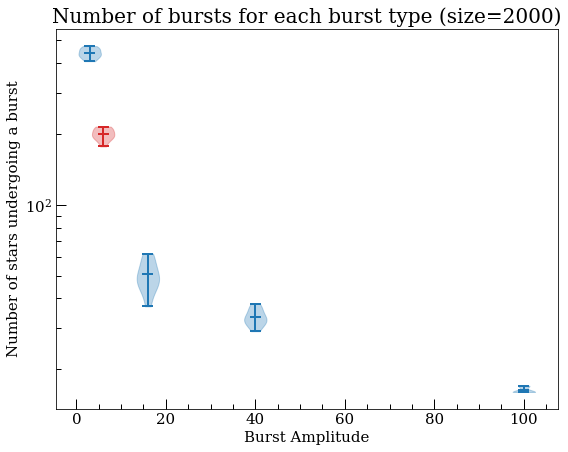

In [108]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

#ax1
v1=ax1.violinplot(data_5bin2000_log,positions=[0.3,1.6,4,10],vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v1['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v1[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v6=ax1.violinplot(data6_log,positions=[0.6],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
#ax1.yaxis.set_ticks_position('both')
#ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)

ax1.set_xticklabels(['0','0','20','40','60','80','100'])

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Burst Amplitude',fontsize=15)
ax1.set_title('Number of bursts for each burst type (size=2000)',fontsize=20)

#ax1.set_xlim(1,200)
plt.yscale('log')
#plt.xscale('log')

plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/comp_2000_5bins_2week_log.jpeg',dpi=300,bbox_inches='tight')

In [ ]:
data100=[cadence_num_bursts2000_1,cadence_num_bursts2000_2_100,cadence_num_bursts2000_3_100,\
        cadence_num_bursts2000_4_100,cadence_num_bursts2000_5_100]
data40=[cadence_num_bursts2000_2_40,cadence_num_bursts2000_3_40,cadence_num_bursts2000_4_40,\
        cadence_num_bursts2000_5_40]
data16=[cadence_num_bursts2000_3_16,cadence_num_bursts2000_4_16,cadence_num_bursts2000_5_16]
data6=[cadence_num_bursts2000_5_6]
data3=[cadence_num_bursts2000_4_3,cadence_num_bursts2000_5_3]

In [ ]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'


#ax1
v100=ax1.violinplot(data100,vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)

v40=ax1.violinplot(data40,positions=[2,3,4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(data16,positions=[3,4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v6=ax1.violinplot(data6,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

v3=ax1.violinplot(data3,positions=[4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)

#v2=ax1.violinplot(data2,positions=[6],vert=True, widths=0.5, showmeans=True, showextrema=True)
#for pc in v2['bodies']:
#    pc.set_facecolor('#8c564b')
#    pc.set_edgecolor('#8c564b')
#    pc.set_alpha(0.3)
#for partname in ('cbars','cmins','cmaxes','cmeans',):
#    vp=v2[partname]
#    vp.set_edgecolor('#8c564b')
#    vp.set_linewidth(2)
    
ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
#ax1.yaxis.set_ticks_position('both')
#ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)
    
ax1.scatter(1,np.mean(cadence_num_bursts2000_1),marker='_',s=300,color='#1f77b4',label='100x')
ax1.scatter(2,np.mean(cadence_num_bursts2000_2_40),marker='_',s=300,color='#ff7f0e',label='40x')
ax1.scatter(3,np.mean(cadence_num_bursts2000_3_16),marker='_',s=300,color='#2ca02c',label='16x')
ax1.scatter(4,np.mean(cadence_num_bursts2000_5_6),marker='_',s=300,color='#d62728',label='6x')
ax1.scatter(5,np.mean(cadence_num_bursts2000_4_3),marker='_',s=300,color='#9467bd',label='3x')
#ax1.scatter(6,np.mean(cadence_num_bursts2000_6_2),marker='_',s=300,color='#8c564b',label='2x')  
plt.legend(loc='upper left',fontsize=12)

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Number of burst types',fontsize=15)
ax1.set_title('Number of bursts for each burst type (size=2000)',fontsize=18)
#plt.yscale('log')

plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/comp_2000_AllBins_normalscale_2week.jpeg',dpi=300,bbox_inches='tight')

In [ ]:
#make it log scale?
data100new=[]
list100=[]
for i in range(5):
    for j in range(600):
        if data100[i][j]!=0:
            list100.append(data100[i][j])
    data100new.append(list100)
    list100=[]
    
data40new=[]
list40=[]
for i in range(4):
    for j in range(600):
        if data40[i][j]!=0:
            list40.append(data40[i][j])
    data40new.append(list40)
    list40=[]
    
data16new=[]
list16=[]
for i in range(3):
    for j in range(600):
        if data16[i][j]!=0:
            list16.append(data16[i][j])
    data16new.append(list16)
    list16=[]
    
data6new=[]
list6=[]
for i in range(1):
    for j in range(600):
        if data6[i][j]!=0:
            list6.append(data6[i][j])
    data6new.append(list6)
    list6=[]
    
data3new=[]
list3=[]
for i in range(2):
    for j in range(600):
        if data3[i][j]!=0:
            list3.append(data3[i][j])
    data3new.append(list3)
    list3=[]

In [ ]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

#ax1
v100=ax1.violinplot(data100new,vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)

v40=ax1.violinplot(data40new,positions=[2,3,4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(data16new,positions=[3,4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v6=ax1.violinplot(data6new,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

v3=ax1.violinplot(data3new,positions=[4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
#ax1.yaxis.set_ticks_position('both')
#ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)
    
ax1.scatter(1,np.mean(cadence_num_bursts2000_1),marker='_',s=300,color='#1f77b4',label='100x')
ax1.scatter(2,np.mean(cadence_num_bursts2000_2_40),marker='_',s=300,color='#ff7f0e',label='40x')
ax1.scatter(3,np.mean(cadence_num_bursts2000_3_16),marker='_',s=300,color='#2ca02c',label='16x')
ax1.scatter(5,np.mean(cadence_num_bursts2000_5_6),marker='_',s=300,color='#d62728',label='6x')
ax1.scatter(4,np.mean(cadence_num_bursts2000_5_3),marker='_',s=300,color='#9467bd',label='3x')
#ax1.scatter(6,np.mean(cadence_num_bursts2000_6_2),marker='_',s=300,color='#8c564b',label='2x')  
plt.legend(loc='lower left',fontsize=13)

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Number of burst types',fontsize=15)
ax1.set_title('Number of bursts for each burst type (size=2000)',fontsize=18)
plt.yscale('log')

plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/comp_2000_Allbins_logscale_2week.jpeg',dpi=300,bbox_inches='tight')

## different observing cadence

In [ ]:
dt_2week=2/52
dt_3month=0.25
dt_6month=0.5

step1=220+dt_2week
step2=step1+dt_3month
step3=step2+dt_6month
step4=step2+(2*dt_6month)
step5=step2+(3*dt_6month)
step6=step2+(4*dt_6month)
step7=step2+(5*dt_6month)
step8=step2+(6*dt_6month)
step9=step2+(7*dt_6month)

t_list_years2=[200,220,step1,step2,step3,step4,step5,step6,step7,step8,step9,225]
t_list_cadence2=[int(i*cadence) for i in t_list_years2]

In [ ]:
cadence_num2_bursts2000_1=[]
for i in range(run):
    for j in t_list_cadence2:
        cadence_num2_bursts2000_1.append(burst_num2000_1[i][j])

In [ ]:
cadence_num2_bursts2000_2_40=[]
cadence_num2_bursts2000_2_100=[]
for i in range(run):
    for j in t_list_cadence2:
        cadence_num2_bursts2000_2_40.append(burst_num2000_2_40[i][j])
        cadence_num2_bursts2000_2_100.append(burst_num2000_2_100[i][j])

In [ ]:
cadence_num2_bursts2000_3_16=[]
cadence_num2_bursts2000_3_40=[]
cadence_num2_bursts2000_3_100=[]
for i in range(run):
    for j in t_list_cadence2:       
        cadence_num2_bursts2000_3_16.append(burst_num2000_3_16[i][j])
        cadence_num2_bursts2000_3_40.append(burst_num2000_3_40[i][j])
        cadence_num2_bursts2000_3_100.append(burst_num2000_3_100[i][j])

In [ ]:
cadence_num2_bursts2000_4_3=[]
cadence_num2_bursts2000_4_16=[]
cadence_num2_bursts2000_4_40=[]
cadence_num2_bursts2000_4_100=[]
for i in range(run):
    for j in t_list_cadence2:
        cadence_num2_bursts2000_4_3.append(burst_num2000_4_3[i][j])      
        cadence_num2_bursts2000_4_16.append(burst_num2000_4_16[i][j])
        cadence_num2_bursts2000_4_40.append(burst_num2000_4_40[i][j])
        cadence_num2_bursts2000_4_100.append(burst_num2000_4_100[i][j])

In [ ]:
cadence_num2_bursts2000_5_3=[]
cadence_num2_bursts2000_5_6=[]
cadence_num2_bursts2000_5_16=[]
cadence_num2_bursts2000_5_40=[]
cadence_num2_bursts2000_5_100=[]
for i in range(run):
    for j in t_list_cadence2:
        cadence_num2_bursts2000_5_3.append(burst_num2000_5_3[i][j])
        cadence_num2_bursts2000_5_6.append(burst_num2000_5_6[i][j])        
        cadence_num2_bursts2000_5_16.append(burst_num2000_5_16[i][j])
        cadence_num2_bursts2000_5_40.append(burst_num2000_5_40[i][j])
        cadence_num2_bursts2000_5_100.append(burst_num2000_5_100[i][j])

In [ ]:
data2_5bin2000=[cadence_num2_bursts2000_5_3,cadence_num2_bursts2000_5_16,\
               cadence_num2_bursts2000_5_40,cadence_num2_bursts2000_5_100]

data2_4bin_2000=[cadence_num2_bursts2000_4_3,cadence_num2_bursts2000_4_16,cadence_num2_bursts2000_4_40,\
                cadence_num2_bursts2000_4_100]

data2_6=[cadence_num2_bursts2000_5_6]

In [ ]:
cadence2_new3=[]
cadence2_new6=[]
cadence2_new16=[]
cadence2_new40=[]
cadence2_new100=[]
for i in range(len(cadence_num2_bursts2000_5_3)):
    #if cadence_num_bursts50[i]==0:
    #    cadence_new50.append(0.1)
    if cadence_num2_bursts2000_5_3[i]!=0:
        cadence2_new3.append(cadence_num2_bursts2000_5_3[i])
        
for i in range(len(cadence_num2_bursts2000_5_6)):
    #if cadence_num_bursts50[i]==0:
    #    cadence_new50.append(0.1)
    if cadence_num2_bursts2000_5_6[i]!=0:
        cadence2_new6.append(cadence_num2_bursts2000_5_6[i])
        
for i in range(len(cadence_num2_bursts2000_5_16)):
    #if cadence_num_bursts50[i]==0:
    #    cadence_new50.append(0.1)
    if cadence_num2_bursts2000_5_16[i]!=0:
        cadence2_new16.append(cadence_num2_bursts2000_5_16[i])
        
for i in range(len(cadence_num2_bursts2000_5_40)):
    #if cadence_num_bursts50[i]==0:
    #    cadence_new50.append(0.1)
    if cadence_num2_bursts2000_5_40[i]!=0:
        cadence2_new40.append(cadence_num2_bursts2000_5_40[i])
        
for i in range(len(cadence_num2_bursts2000_5_100)):
    #if cadence_num_bursts50[i]==0:
    #    cadence_new50.append(0.1)
    if cadence_num2_bursts2000_5_100[i]!=0:
        cadence2_new100.append(cadence_num2_bursts2000_5_100[i])
        
data2_5bin2000_log=[cadence2_new3,cadence2_new16,cadence2_new40,cadence2_new100]
data2_6_log=[cadence2_new6]

In [ ]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

#ax1
v1=ax1.violinplot(data2_5bin2000_log,positions=[0.3,1.6,4,10],vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v1['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v1[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v6=ax1.violinplot(data2_6_log,positions=[0.6],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
#ax1.yaxis.set_ticks_position('both')
#ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)

ax1.set_xticklabels(['0','0','20','40','60','80','100'])

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Burst Amplitude',fontsize=15)
ax1.set_title('Number of bursts for each burst type (size=2000)',fontsize=20)

#ax1.set_xlim(1,200)
plt.yscale('log')
#plt.xscale('log')

plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/comp2_2000_5bins_2week_log.jpeg',dpi=300,bbox_inches='tight')

In [ ]:
data2_100=[cadence_num2_bursts2000_1,cadence_num2_bursts2000_2_100,cadence_num2_bursts2000_3_100,\
        cadence_num2_bursts2000_4_100,cadence_num2_bursts2000_5_100]
data2_40=[cadence_num2_bursts2000_2_40,cadence_num2_bursts2000_3_40,cadence_num2_bursts2000_4_40,\
        cadence_num2_bursts2000_5_40]
data2_16=[cadence_num2_bursts2000_3_16,cadence_num2_bursts2000_4_16,cadence_num2_bursts2000_5_16]
data2_6=[cadence_num2_bursts2000_5_6]
data2_3=[cadence_num2_bursts2000_4_3,cadence_num2_bursts2000_5_3]

In [ ]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'


#ax1
v100=ax1.violinplot(data2_100,vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)

v40=ax1.violinplot(data2_40,positions=[2,3,4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(data2_16,positions=[3,4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v6=ax1.violinplot(data2_6,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

v3=ax1.violinplot(data2_3,positions=[4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
#ax1.yaxis.set_ticks_position('both')
#ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)
    
ax1.scatter(1,np.mean(cadence_num2_bursts2000_1),marker='_',s=300,color='#1f77b4',label='100x')
ax1.scatter(2,np.mean(cadence_num2_bursts2000_2_40),marker='_',s=300,color='#ff7f0e',label='40x')
ax1.scatter(3,np.mean(cadence_num2_bursts2000_3_16),marker='_',s=300,color='#2ca02c',label='16x')
ax1.scatter(4,np.mean(cadence_num2_bursts2000_5_6),marker='_',s=300,color='#d62728',label='6x')
ax1.scatter(5,np.mean(cadence_num2_bursts2000_5_3),marker='_',s=300,color='#9467bd',label='3x')
#ax1.scatter(6,np.mean(cadence_num_bursts2000_6_2),marker='_',s=300,color='#8c564b',label='2x')  
plt.legend(loc='upper left',fontsize=12)

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Number of burst types',fontsize=15)
ax1.set_title('Number of bursts for each burst type (size=2000)',fontsize=18)
#plt.yscale('log')

plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/comp2_2000_AllBins_normalscale_2week.jpeg',dpi=300,bbox_inches='tight')

In [ ]:
#make it log scale?
data2_100new=[]
list2_100=[]
for i in range(5):
    for j in range(600):
        if data2_100[i][j]!=0:
            list2_100.append(data2_100[i][j])
    data2_100new.append(list2_100)
    list2_100=[]
    
data2_40new=[]
list2_40=[]
for i in range(4):
    for j in range(600):
        if data2_40[i][j]!=0:
            list2_40.append(data2_40[i][j])
    data2_40new.append(list2_40)
    list2_40=[]
    
data2_16new=[]
list2_16=[]
for i in range(3):
    for j in range(600):
        if data2_16[i][j]!=0:
            list2_16.append(data2_16[i][j])
    data2_16new.append(list2_16)
    list2_16=[]
    
data2_6new=[]
list2_6=[]
for i in range(1):
    for j in range(600):
        if data2_6[i][j]!=0:
            list2_6.append(data2_6[i][j])
    data2_6new.append(list2_6)
    list2_6=[]
    
data2_3new=[]
list2_3=[]
for i in range(2):
    for j in range(600):
        if data2_3[i][j]!=0:
            list2_3.append(data2_3[i][j])
    data2_3new.append(list2_3)
    list2_3=[]

In [ ]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

#ax1
v100=ax1.violinplot(data2_100new,vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)

v40=ax1.violinplot(data2_40new,positions=[2,3,4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(data2_16new,positions=[3,4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v6=ax1.violinplot(data2_6new,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

v3=ax1.violinplot(data2_3new,positions=[4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
#ax1.yaxis.set_ticks_position('both')
#ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)
    
ax1.scatter(1,np.mean(cadence_num2_bursts2000_1),marker='_',s=300,color='#1f77b4',label='100x')
ax1.scatter(2,np.mean(cadence_num2_bursts2000_2_40),marker='_',s=300,color='#ff7f0e',label='40x')
ax1.scatter(3,np.mean(cadence_num2_bursts2000_3_16),marker='_',s=300,color='#2ca02c',label='16x')
ax1.scatter(4,np.mean(cadence_num2_bursts2000_5_6),marker='_',s=300,color='#d62728',label='6x')
ax1.scatter(5,np.mean(cadence_num2_bursts2000_5_3),marker='_',s=300,color='#9467bd',label='3x')
#ax1.scatter(6,np.mean(cadence_num_bursts2000_6_2),marker='_',s=300,color='#8c564b',label='2x')  
plt.legend(loc='lower left',fontsize=13)

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Number of burst types',fontsize=15)
ax1.set_title('Number of bursts for each burst type (size=2000)',fontsize=18)
plt.yscale('log')

plt.plot()
plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/comp2_2000_Allbins_logscale_2week.jpeg',dpi=300,bbox_inches='tight')